# Load data in

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

## Clean & understand data

In [148]:
crime.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [149]:
crime.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude'],
      dtype='object')

In [150]:
crime.shape

(852950, 27)

In [151]:
crime.dtypes

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
crime_description       object
modus_operandi          object
victim_age               int64
victim_sex              object
victim_descent          object
premise_code           float64
premise_description     object
weapon_code            float64
weapon_description      object
status                  object
status_description      object
crime_code_1           float64
crime_code_2           float64
crime_code_3           float64
crime_code_4           float64
location                object
cross_street            object
latitude               float64
longitude              float64
dtype: object

In [152]:
crime.isnull().sum()

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112614
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
dtype: int64

In [159]:
#Drop columns containing several null values
df = crime.drop(labels = ['modus_operandi', 'weapon_code', 'weapon_description', 'crime_code_2', 'crime_code_3', 'crime_code_4', 'cross_street'], axis = 1)

In [161]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487


In [31]:
df.sort_values(by = 'date_reported').tail(20)

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
771758,231016752,2023-12-04,2023-12-04 14:00:00,10,West Valley,1018,2,649,DOCUMENT FORGERY / STOLEN FELONY,0,M,W,203.0,OTHER BUSINESS,IC,Invest Cont,649.0,7500 WOODLEY AV,34.2066,-118.4837
735102,230125551,2023-12-04,2023-12-04 10:00:00,1,Central,146,1,210,ROBBERY,0,NaN,NaN,102.0,SIDEWALK,IC,Invest Cont,210.0,5TH,34.0458,-118.2472
771502,230917044,2023-12-04,2023-12-03 15:00:00,9,Van Nuys,989,2,624,BATTERY - SIMPLE ASSAULT,51,F,A,717.0,HEALTH SPA/GYM,IC,Invest Cont,624.0,13700 VENTURA BL,34.1480,-118.4312
692027,231820306,2023-12-04,2023-10-11 12:38:00,18,Southeast,1827,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,X,X,704.0,ELEMENTARY SCHOOL,IC,Invest Cont,341.0,9200 GRAPE ST,33.9530,-118.2363
816354,230717970,2023-12-04,2023-12-04 05:45:00,7,Wilshire,701,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,NaN,NaN,707.0,GARAGE/CARPORT,IC,Invest Cont,341.0,900 N CROFT AV,34.0870,-118.3743
771244,230320770,2023-12-04,2023-12-03 09:50:00,3,Southwest,392,2,624,BATTERY - SIMPLE ASSAULT,0,NaN,NaN,801.0,MTA BUS,IC,Invest Cont,624.0,VERNON AV,34.0037,-118.3236
675367,231224234,2023-12-04,2023-12-03 20:00:00,12,77th Street,1269,1,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,IC,Invest Cont,510.0,7900 S SAN PEDRO ST,33.9674,-118.2695
675327,230415035,2023-12-04,2023-09-06 09:35:00,4,Hollenbeck,478,2,354,THEFT OF IDENTITY,0,NaN,NaN,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354.0,1000 S LORENA ST,34.0257,-118.2023
675228,231421222,2023-12-04,2023-12-04 23:00:00,14,Pacific,1488,1,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,IC,Invest Cont,510.0,5800 W MANCHESTER AV,33.9598,-118.3826
848130,230917065,2023-12-04,2023-12-01 18:21:00,9,Van Nuys,938,1,310,BURGLARY,0,NaN,NaN,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,5800 HILLVIEW PARK AV,34.1758,-118.4249


In [163]:
#Update datatypes
df['date_reported'] = pd.to_datetime(df['date_reported'], format = '%Y-%m-%d')
df['date_occurred'] = pd.to_datetime(df['date_occurred'])

In [167]:
df_age = df[df['victim_age'] > 0]

In [169]:
df_age['victim_age'].value_counts()

victim_age
30     19421
35     19008
31     18603
29     18552
28     18266
       ...  
95        89
96        88
98        67
97        63
120        1
Name: count, Length: 99, dtype: int64

In [171]:
df['year'] = df['date_occurred'].dt.year
df['month'] = df['date_occurred'].dt.month

In [173]:
df.sort_values(by = 'date_reported')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month
39025,201004026,2020-01-01,2020-01-01 18:23:00,10,West Valley,1091,1,310,BURGLARY,44,...,504.0,OTHER RESIDENCE,IC,Invest Cont,310.0,3800 WINFORD DR,34.1386,-118.5525,2020,1
137157,202100503,2020-01-01,2020-01-01 13:15:00,21,Topanga,2189,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),75,...,402.0,MARKET,AA,Adult Arrest,343.0,20000 W VENTURA BL,34.1719,-118.5684,2020,1
2389,200304056,2020-01-01,2020-01-01 14:37:00,3,Southwest,329,2,888,TRESPASSING,19,...,255.0,"AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, E...",IC,Invest Cont,888.0,3300 S FIGUEROA ST,34.0225,-118.2796,2020,1
103594,201804032,2020-01-01,2020-01-01 12:50:00,18,Southeast,1823,1,210,ROBBERY,50,...,102.0,SIDEWALK,IC,Invest Cont,210.0,CENTURY,33.9456,-118.2652,2020,1
25891,200104434,2020-01-01,2020-01-01 02:50:00,1,Central,128,1,330,BURGLARY FROM VEHICLE,26,...,108.0,PARKING LOT,AO,Adult Other,330.0,300 E 2ND ST,34.0498,-118.2400,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770235,230125557,2023-12-04,2023-12-04 06:50:00,1,Central,111,1,330,BURGLARY FROM VEHICLE,0,...,717.0,HEALTH SPA/GYM,IC,Invest Cont,330.0,700 W CESAR E CHAVEZ AV,34.0606,-118.2439,2023,12
692345,231917421,2023-12-04,2023-12-03 09:45:00,19,Mission,1936,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,...,101.0,STREET,IC,Invest Cont,420.0,11400 AMBOY AV,34.2767,-118.4477,2023,12
835683,232117291,2023-12-04,2023-03-01 12:00:00,21,Topanga,2125,2,354,THEFT OF IDENTITY,0,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354.0,21400 SATICOY ST,34.2119,-118.6017,2023,3
825607,231116467,2023-12-04,2023-12-01 22:30:00,11,Northeast,1141,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0,...,101.0,STREET,IC,Invest Cont,331.0,N KENMORE AV,34.1018,-118.2973,2023,12


In [297]:
plt.style.use('ggplot')

<Axes: xlabel='month'>

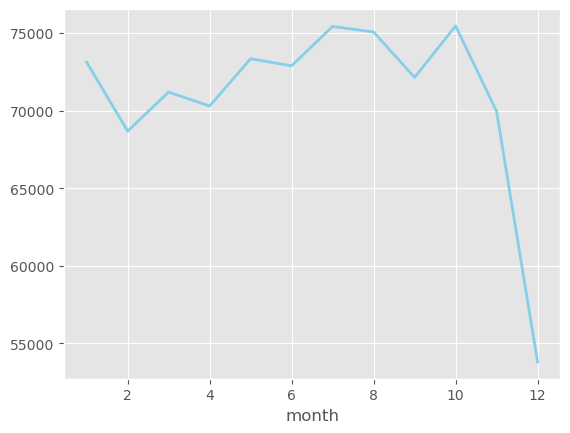

In [301]:
df['month'].value_counts().sort_index().plot(color='skyblue', linewidth = 2)

In [291]:
plt.style.use('ggplot')

<Axes: xlabel='year'>

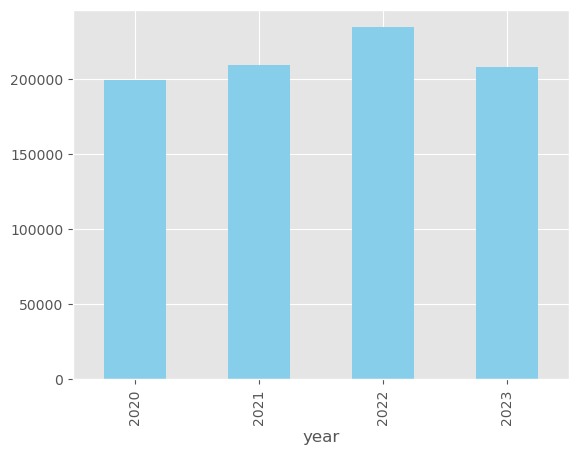

In [295]:
df['year'].value_counts().sort_index().plot(kind='bar', color = 'skyblue')

In [179]:
df = df[~((df['month'] == 12) & (df['year'] == 2023))]

In [181]:
df.sort_values(by = 'date_occurred')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month
168264,201810982,2020-05-11,2020-01-01 00:01:00,18,Southeast,1822,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",17,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,810.0,400 W CENTURY BL,33.9456,-118.2808,2020,1
196441,220706832,2022-03-16,2020-01-01 00:01:00,7,Wilshire,782,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0,...,203.0,OTHER BUSINESS,IC,Invest Cont,668.0,1800 S FAIRFAX AV,34.0431,-118.3692,2020,1
1559,210708670,2021-05-11,2020-01-01 00:01:00,7,Wilshire,775,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,13,...,710.0,OTHER PREMISE,AO,Adult Other,812.0,1700 S LONGWOOD AV,34.0437,-118.3440,2020,1
199361,221818077,2022-09-28,2020-01-01 00:01:00,18,Southeast,1801,1,820,ORAL COPULATION,6,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,812.0,500 W 92ND ST,33.9528,-118.2827,2020,1
129124,201704365,2020-01-02,2020-01-01 00:01:00,17,Devonshire,1761,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,...,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,740.0,9500 OWENSMOUTH AV,34.2427,-118.6021,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672120,230717815,2023-12-01,2023-11-30 23:45:00,7,Wilshire,702,1,310,BURGLARY,30,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,700 N VISTA ST,34.0836,-118.3523,2023,11
766816,230917064,2023-12-04,2023-11-30 23:48:00,9,Van Nuys,984,1,310,BURGLARY,0,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,14600 SUTTON ST,34.1477,-118.4530,2023,11
770137,230221843,2023-12-01,2023-11-30 23:50:00,2,Rampart,216,1,510,VEHICLE - STOLEN,0,...,101.0,STREET,IC,Invest Cont,510.0,1000 CORONADO TR,34.0777,-118.2688,2023,11
726894,231116332,2023-12-01,2023-11-30 23:50:00,11,Northeast,1132,2,888,TRESPASSING,0,...,203.0,OTHER BUSINESS,IC,Invest Cont,888.0,3200 RIVERSIDE DR,34.1143,-118.2695,2023,11


In [279]:
plt.style.use('ggplot')

<Axes: xlabel='year,month'>

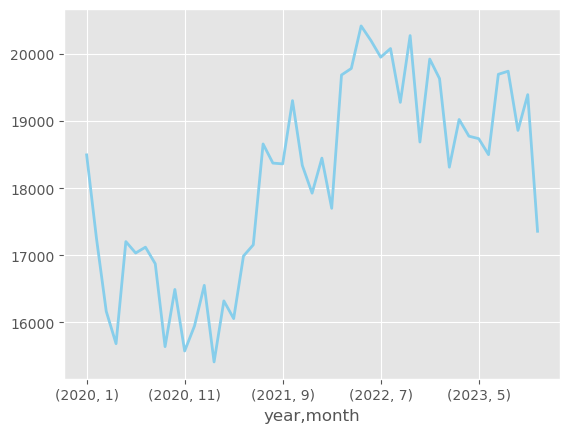

In [283]:
crime_over_time = df.groupby(['year','month']).size().plot(color='skyblue', linewidth = 2)
crime_over_time

In [ ]:
plt.style.use('ggplot')

(array([3.96800e+03, 1.86630e+04, 9.81120e+04, 1.44858e+05, 1.22469e+05,
        8.64850e+04, 7.20760e+04, 4.59690e+04, 2.94150e+04, 1.28000e+04,
        4.50300e+03, 1.27400e+03, 4.41000e+02, 0.00000e+00, 1.00000e+00]),
 array([  2.        ,   9.86666667,  17.73333333,  25.6       ,
         33.46666667,  41.33333333,  49.2       ,  57.06666667,
         64.93333333,  72.8       ,  80.66666667,  88.53333333,
         96.4       , 104.26666667, 112.13333333, 120.        ]),
 <BarContainer object of 15 artists>)

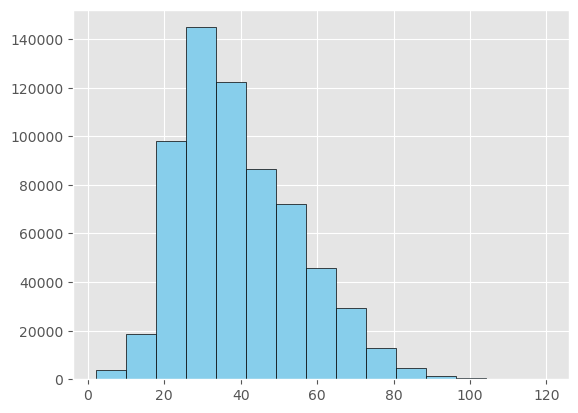

In [277]:
plt.hist(df_age['victim_age'], edgecolor = 'black', bins=15, color = 'skyblue')

In [203]:
df['date_occurred_no_time'] = df['date_occurred'].dt.date

/var/folders/50/kclhm2493yldwb75yt_k454r0000gn/T/ipykernel_2986/2178151606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_occurred_no_time'] = df['date_occurred'].dt.date


In [217]:
crime_count_per_day = df.groupby(['date_occurred_no_time', 'crime_description']).size()

In [233]:
top_20_crimes = crime_count_per_day.groupby('crime_description').mean().reset_index(name = 'avg_daily_count').sort_values(by = 'avg_daily_count', ascending = False).head(20)

In [237]:
top_20_crimes_sorted = top_20_crimes.sort_values(by = 'avg_daily_count', ascending = True)

In [ ]:
plt.style.use('ggplot')

<BarContainer object of 20 artists>

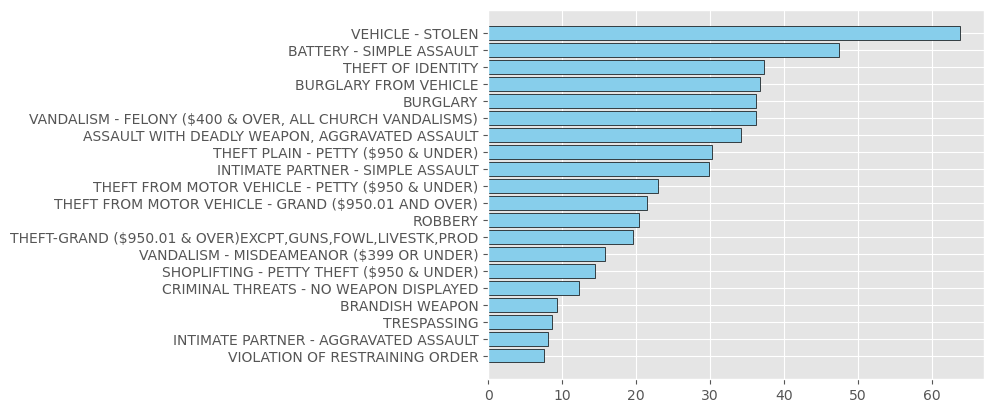

In [289]:
plt.barh(top_20_crimes_sorted['crime_description'],top_20_crimes_sorted['avg_daily_count'], color = 'skyblue',edgecolor = 'black')

In [257]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Top 20 Crimes')

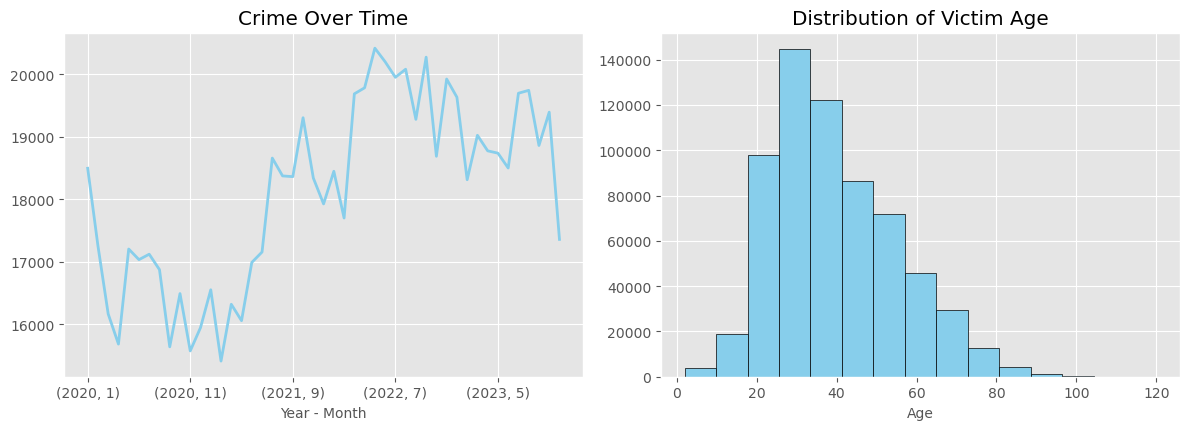

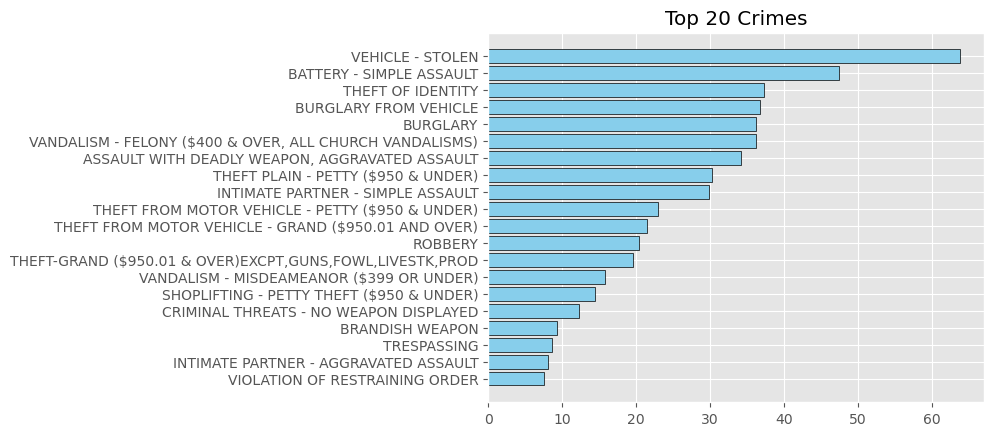

In [317]:
plt.figure(figsize = (12,8))

#1 - line chart
plt.subplot(2,2,1)
crime_plot = df.groupby(['year','month']).size().plot(color = 'skyblue', linewidth = 2)
crime_plot.set_xlabel("Year - Month", fontsize=10)
crime_plot.set_title("Crime Over Time")

#2 - histogram
plt.subplot(2,2,2)
plt.hist(df_age['victim_age'], edgecolor = 'black', bins=15, color = 'skyblue')
plt.tight_layout()
plt.xlabel("Age", fontsize=10)
plt.title("Distribution of Victim Age")

#3 - horizontal bar
plt.figure()
plt.barh(top_20_crimes_sorted['crime_description'],top_20_crimes_sorted['avg_daily_count'], color = 'skyblue', edgecolor = 'black')
plt.title("Top 20 Crimes")

# How long does it take to report a crime? (Difference between reported and occured)

In [338]:
df['Time to Report'] = (pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_occurred_no_time'])).dt.days

/var/folders/50/kclhm2493yldwb75yt_k454r0000gn/T/ipykernel_2986/3108418235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time to Report'] = (pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_occurred_no_time'])).dt.days


In [328]:
df['Time to Report'].value_counts().reset_index()

,Time to Report,count
0,0 days,419620
1,1 days,185029
2,2 days,52808
3,3 days,30894
4,4 days,19932
...,...,...
1222,1167 days,1
1223,1137 days,1
1224,1290 days,1
1225,1056 days,1


In [344]:
df.groupby(['crime_description'])['Time to Report'].mean().sort_values()

crime_description
FAILURE TO DISPERSE                                           0.000000
DISRUPT SCHOOL                                                0.083333
PURSE SNATCHING - ATTEMPT                                     0.083333
PETTY THEFT - AUTO REPAIR                                     0.125000
LYNCHING                                                      0.157895
                                                               ...    
DISHONEST EMPLOYEE ATTEMPTED THEFT                           87.000000
LEWD/LASCIVIOUS ACTS WITH CHILD                              97.324675
SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ    110.913921
SEX OFFENDER REGISTRANT OUT OF COMPLIANCE                   123.779056
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)    128.181013
Name: Time to Report, Length: 138, dtype: float64

### Top 3 crimes with highest average victim age

In [353]:
df_age.groupby(['crime_description'])['victim_age'].mean().reset_index().sort_values(by = 'victim_age', ascending = False).head(3)

,crime_description,victim_age
45,DISHONEST EMPLOYEE ATTEMPTED THEFT,60.000000
12,BLOCKING DOOR INDUCTION CENTER,54.666667
77,LYNCHING,53.000000


### Areas with highest number of crimes during nighttime 

In [358]:
nighttime_crimes = df[(df['date_occurred'].dt.hour) >= 20 | (df['date_occurred'].dt.hour < 3)]

In [362]:
nighttime_crimes['area_name'].value_counts().reset_index()

,area_name,count
0,Central,55315
1,77th Street,51137
2,Pacific,47889
3,Southwest,45718
4,Hollywood,42763
5,Southeast,41080
6,Olympic,41050
7,Newton,40779
8,N Hollywood,40628
9,Wilshire,39196


In [370]:
hourly_crimes = df['date_occurred'].dt.hour.value_counts().sort_index().reset_index()

<BarContainer object of 24 artists>

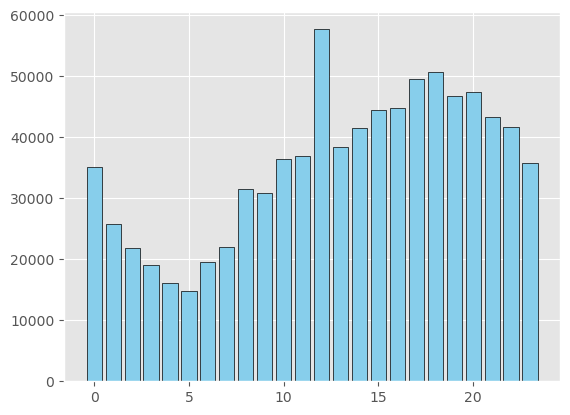

In [374]:
plt.bar(hourly_crimes['date_occurred'], hourly_crimes['count'], edgecolor = 'black', color = 'skyblue')

### Crime count by time of day

In [382]:
df[df['date_occurred'].dt.hour == 12]['crime_description'].value_counts()

crime_description
THEFT OF IDENTITY                               9098
VEHICLE - STOLEN                                4048
BATTERY - SIMPLE ASSAULT                        3958
THEFT PLAIN - PETTY ($950 & UNDER)              3785
BURGLARY                                        2945
                                                ... 
DRUGS, TO A MINOR                                  1
THEFT, COIN MACHINE - GRAND ($950.01 & OVER)       1
BIGAMY                                             1
GRAND THEFT / INSURANCE FRAUD                      1
INCITING A RIOT                                    1
Name: count, Length: 124, dtype: int64

In [408]:
no_identity_theft = df[~(df['crime_description'] == 'THEFT OF IDENTITY')]

In [420]:
new_hourly = no_identity_theft['date_occurred'].value_counts().sort_index().reset_index()

In [432]:
new_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289112 entries, 0 to 289111
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_occurred  289112 non-null  datetime64[ns]
 1   count          289112 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 MB


In [434]:
new_hourly = no_identity_theft['date_occurred'].dt.hour.value_counts().sort_index().reset_index()

<BarContainer object of 24 artists>

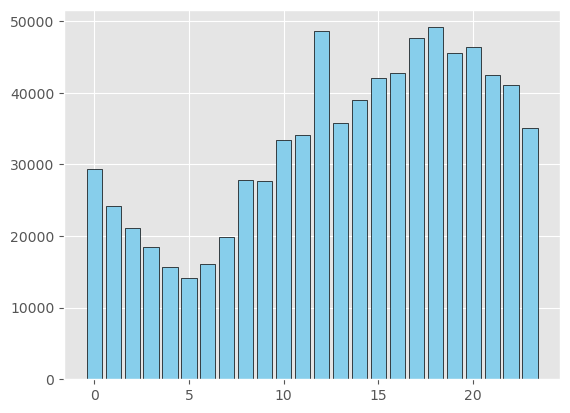

In [440]:
plt.bar(new_hourly['date_occurred'], new_hourly['count'], edgecolor = 'black', color = 'skyblue')

# Note: Stolen Vehicles default to 12 pm, hence the abnormal peak